$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

In [2]:
%load_ext autoreload
%autoreload 2

topics = ['Classification with Nonlinear Logistic Regression Using Neural Networks',
          'Motivation and Setup',
          'Derivation',
          'Gradient of the Log Likelihood',
          'Linear Version',
          'Nonlinear Version',
          'Two-Dimensional Data Example',
          'Accelerometer Data Example',
          'Better Representation of Time-Varying Signals with Continuous Wavelet Transform']


# Classification with Nonlinear Logistic Regression Using Neural Networks

## Motivation and Setup

Linear function approximator as a neural network.

<img src="https://www.cs.colostate.edu/~anderson/cs545/notebooks/figures/nnlinear.png">

What must we add to do logistic regression?

Just add the softmax calculation to the output layer. 

<img src="https://www.cs.colostate.edu/~anderson/cs545/notebooks/figures/nnlinearlogisticregression.png">

Any thoughts on how to do nonlinear logistic regression?

<img src="https://www.cs.colostate.edu/~anderson/cs545/notebooks/figures/nntwolayerlogisticregression.png">


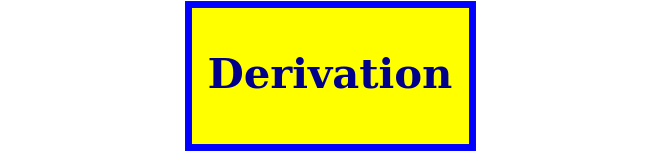

In [8]:
banner.next_topic()

## Derivation

We will maximize the log likelihood of the training data.
$$
  \begin{align*}
    L(\Wv) & = \left ( \prod_{n=1}^N \prod_{k=1}^K P(C=k|\xv_n)^{t_{n,k}} \right ) \\
    \log L(\Wv) & = LL(\Wv) =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log P(C=k|\xv_n)\\
     & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log g_{n,k}
   \end{align*}
$$

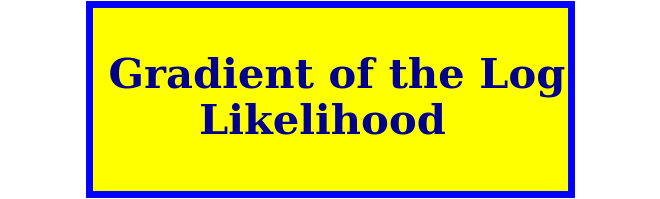

In [9]:
banner.next_topic()

## Gradient of the Log Likelihood

$$
      \begin{align*}
        LL(\Wv) & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k}
      \log g_{n,k}\;\;\;\;\; \text{ where } g_{n,k}  =  
               \frac{\eby{k}}{\sum_{m=1}^K \eby{m}}; \\
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{g_{n,k}} \frac{\partial g_{n,k}}{\partial \Wv_{d,j}}\\    
        \end{align*}
$$



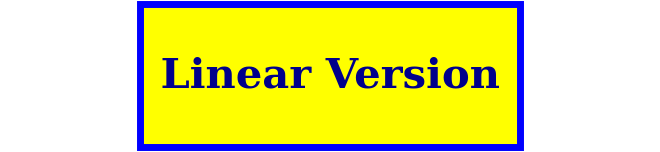

In [10]:
banner.next_topic()

## Linear Version

General gradient

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}
      \end{align*}
$$

For linear logistic regression, $y_{n,j} = \xv_n^T \Wv_{*,j}$, so $\frac{\partial y_{n,k}}{\partial \Wv_{d,j}}$ exists only when $j=k$, so

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N (t_{n,j} - g_{n,j}) \frac{\partial y_{n,j}}{\partial \Wv_{d,j}}\\
         & =  \sum_{n=1}^N \left ( t_{n,j} - g_{n,j} \right ) \xv_{d,j}
      \end{align*}
$$

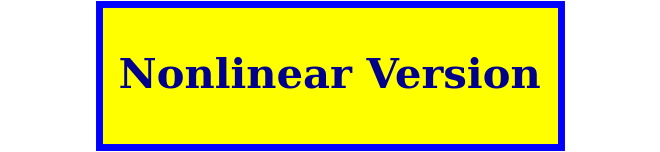

In [11]:
banner.next_topic()

## Nonlinear Version

First the general form again.

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}
      \end{align*}
$$

Now $y_{n,j}$ depends on $\Vv$ and $\Wv$, so

$$
      \begin{align*}
        \frac{\partial LL(\Vv,\Wv)}{\partial \Vv_{d,m}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & = \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$


But, thank goodness, we have already calculated $\frac{\partial y_{n,k}}{\partial \Vv_{d,m}}$ and 
$\frac{\partial y_{n,k}}{\partial \Wv_{m,k}}$ in our previous neural network lectures.  This becomes more clear when we compare above with the derivatives of
mean squared error with respect to weights for neural networks for regression problems.

$$
      \begin{align*}
      E &= \frac{1}{NK}  \frac{1}{2} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
      \frac{\partial E}{\partial \Vv_{d,m}} & = - \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
      \frac{\partial E}{\partial \Wv_{m,j}} & = - \frac{1}{NK}  \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
      \frac{\partial E}{\partial \Wv_{m,j}} & = - \frac{1}{NK}  \sum_{n=1}^N  (t_{n,j} - y_{n,j}) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$

Compare to gradients for likelihood

$$
      \begin{align*}
        LL(\Vv,\Wv) & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log
        g_{n,k} \text{ where }  g_{n,k}  =  
               \frac{\eby{k}}{\sum_{m=1}^{K} \eby{m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Vv_{d,m}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$


So, our previously derived matrix expressions for neural networks can
be used if we modify the output calculation.  Here are the expressions
we used for minimizing mean squared error:

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        E &= \frac{1}{NK} \frac{1}{2} \sum (\Tv - \Yv)^2\\
        \grad_\Vv E &=  - \frac{1}{NK}  \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv E &=  - \frac{1}{NK} \tilde{\Zv}^T (\Tv - \Yv)
      \end{align*}
$$


Here are the changes needed for nonlinear logistic regression. $\Tiv$
is indicator variables for  $\Tv$  

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        \Fv &= e^{\Yv}\\
        \Sv &= \Fv \ones{K}\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ sum across columns}\\
        \Gv &= \Fv / \left [ \Sv, \Sv,\ldots,\Sv \right ] \;\;\; \Sv \text{ are column vectors }\\
        LL &=  \sum \Tiv \log \Gv\\
        \grad_\Vv LL &=    \tilde{\Xv}^T \left ( (\Tiv - \Gv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv LL &=   \tilde{\Zv}^T (\Tiv - \Gv)
      \end{align*}
$$

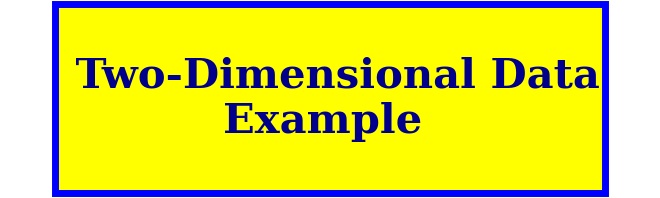

In [12]:
banner.next_topic()

## Two-Dimensional Data Example

In [13]:
import numpy as np
import matplotlib.pyplot as plt

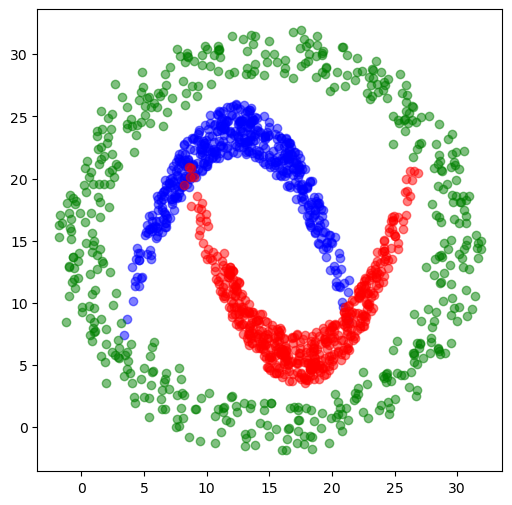

In [14]:
n = 500
x1 = np.linspace(5, 20, n) + np.random.uniform(-2, 2, n)
y1 = ((20-12.5)**2-(x1-12.5)**2) / (20-12.5)**2 * 10 + 14 + np.random.uniform(-2, 2, n)
x2 = np.linspace(10, 25, n) + np.random.uniform(-2, 2, n)
y2 = ((x2-17.5)**2) / (25-17.5)**2 * 10 + 5.5 + np.random.uniform(-2, 2, n)
angles = np.linspace(0, 2*np.pi, n)
x3 = np.cos(angles) * 15 + 15 + np.random.uniform(-2, 2, n)
y3 = np.sin(angles) * 15 + 15 + np.random.uniform(-2, 2, n)
X =  np.vstack((np.hstack((x1, x2, x3)),  np.hstack((y1, y2, y3)))).T
T = np.repeat(range(1, 4), n).reshape((-1, 1))
colors = ['blue', 'red', 'green']
plt.figure(figsize=(6, 6))
for c in range(1, 4):
    mask = (T == c).flatten()
    plt.plot(X[mask, 0], X[mask, 1], 'o', markersize=6,  alpha=0.5,  color=colors[c-1])

Let's try to classify this data with a 5 hidden unit neural network with nonlinear logistic regression.

In Python, do this by defining a new class `NeuralNetworkClassifier`. It is easy to create a new class for using a neural network
as a classifier by making a subclass `NeuralNetworkClassifier` of the
`NeuralNetwork` and make the required changes.  The changes will be in `_error_f`, `_gradient_f`, `train`, and `use` functions.  <font color='red'>This is the topic of A4 !!  Once you have completed that, you will be able to run the remaining examples in this notebook.</font>

Let's import your `neuralnetworksA4.py` from your solution to A4.

In [9]:
import neuralnetworksA4 as nn

In [10]:
len(np.unique(T))

3

SCG: Epoch 5 Likelihood= Train 0.74862 Validate 0.74862
SCG: Epoch 10 Likelihood= Train 0.74862 Validate 0.74862
SCG: Epoch 15 Likelihood= Train 0.76897 Validate 0.76897
SCG: Epoch 20 Likelihood= Train 0.84313 Validate 0.84313
SCG: Epoch 25 Likelihood= Train 0.88070 Validate 0.88070
SCG: Epoch 30 Likelihood= Train 0.92853 Validate 0.92853
SCG: Epoch 35 Likelihood= Train 0.94263 Validate 0.94263
SCG: Epoch 40 Likelihood= Train 0.95600 Validate 0.95600
SCG: Epoch 45 Likelihood= Train 0.96545 Validate 0.96545
SCG: Epoch 50 Likelihood= Train 0.97082 Validate 0.97082


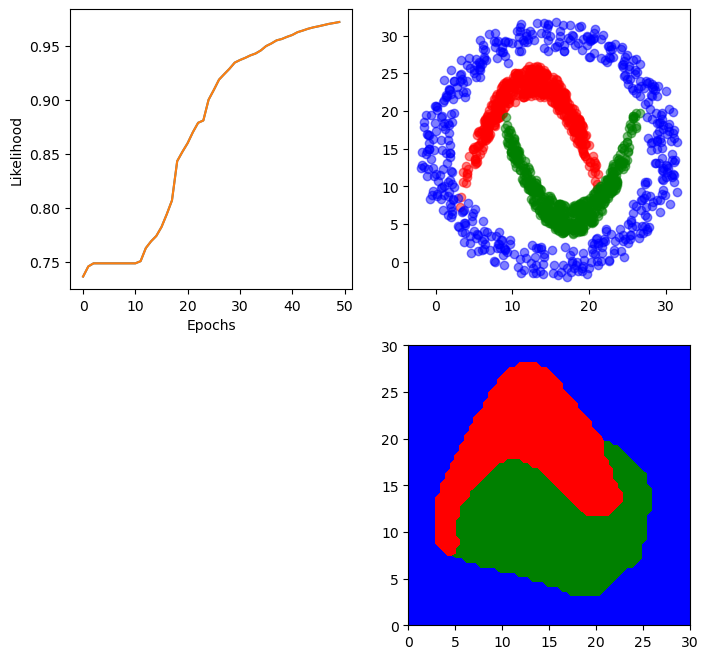

In [11]:
import mpl_toolkits.mplot3d as plt3
from matplotlib import cm

nnet = nn.NeuralNetworkClassifier(X.shape[1], [8], len(np.unique(T)))
nnet.train(X, T, X, T, n_epochs=50,  method='scg')
# nnet.train(X, T, n_epochs=5000,  method='sgd', learning_rate=0.1)

n_xs = 60
xs = np.linspace(0, 30, n_xs)
x, y = np.meshgrid(xs, xs)
Xtest = np.vstack((x.flat, y.flat)).T
predTest, probs = nnet.use(Xtest)

plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.plot(nnet.get_performance_trace())
plt.xlabel("Epochs")
plt.ylabel("Likelihood")

# plt.subplot(2, 2, 3)
# nnet.draw()

colors = ['red', 'green', 'blue']
plt.subplot(2, 2, 2)

for c in range(1, 4):
    mask = (T == c).flatten()
    plt.plot(X[mask, 0], X[mask, 1], 'o', markersize=6,  alpha=0.5,  color=colors[c-1])

plt.subplot(2, 2, 4)
shape = (n_xs, n_xs)
plt.contourf(Xtest[:, 0].reshape(shape), Xtest[:, 1].reshape(shape),  predTest.reshape(shape), 
             levels = [0.5, 1.99, 2.01, 3.5],  #    levels=(0.5, 1.5, 2.5, 3.5), 
             colors=('red', 'green', 'blue'));

In [12]:
def percent_correct(Y, T):
    return np.mean(T == Y) * 100

In [13]:
percent_correct(nnet.use(X)[0], T)

98.13333333333333

In [14]:
from matplotlib.colors import LightSource

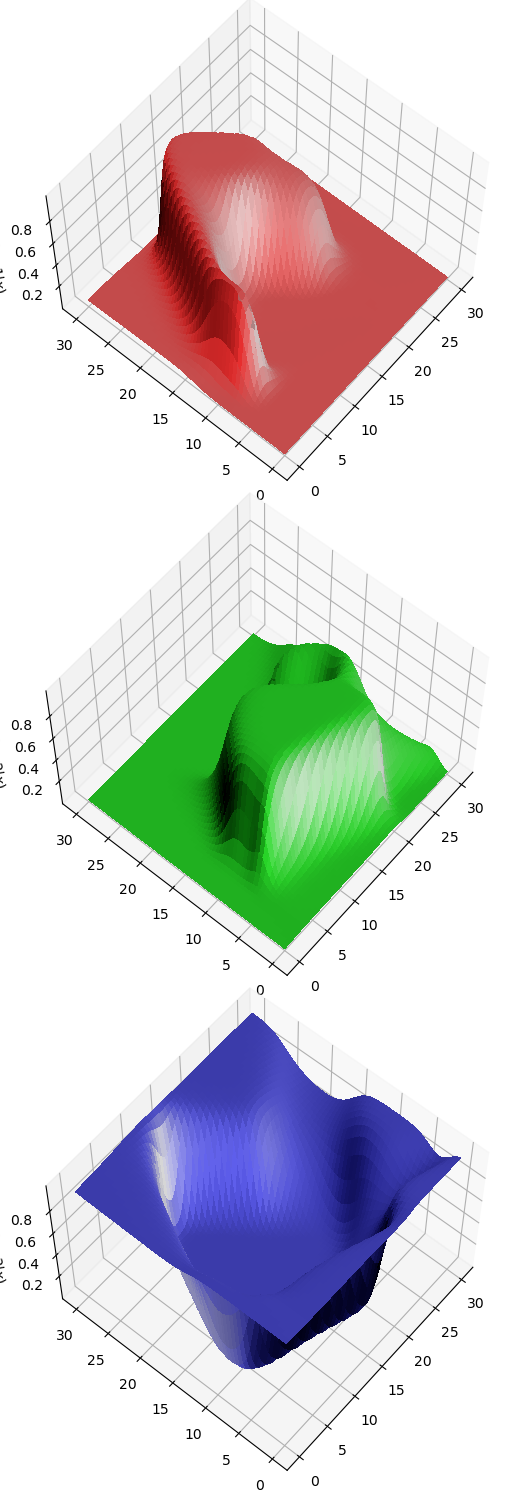

In [15]:
fig = plt.figure(figsize=(5, 15))
ls = LightSource(azdeg=30,  altdeg=10)
white = np.ones((x.shape[0],  x.shape[1],  3))
red = white * np.array([1, 0.2, 0.2])
green = white * np.array([0.2, 1, 0.2])
blue = white * np.array([0.4, 0.4, 1])
colors = [red,  green,  blue]

for c in range(3):
    ax = fig.add_subplot(3, 1, c+1, projection='3d')
    ax.view_init(azim = 180+40, elev = 60)
    Z = probs[:,  c].reshape(x.shape)
    rgb = ls.shade_rgb(colors[c],  Z,  vert_exag=0.1)
    ax.plot_surface(x, y, Z, 
                    rstride=1, cstride=1, linewidth=0,  antialiased=False, 
                    shade=True,  facecolors=rgb)
    ax.set_zlabel(r'$p(C='+str(c+1)+'|x)$')
plt.tight_layout()

How would you plot the outputs of the hidden units?

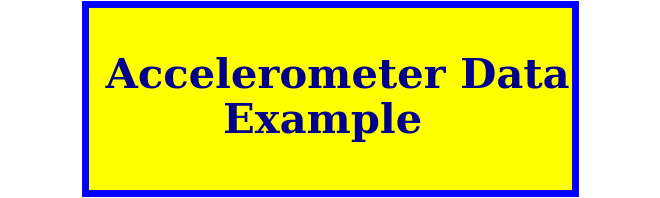

In [15]:
banner.next_topic()

## Accelerometer Data Example

Let's try to determine what a child is doing based on data from a write accelerometer. Download [accelerometers.npy](https://www.cs.colostate.edu/~anderson/cs545/notebooks/accelerometers.npy).

In [17]:
data = np.load('accelerometers.npy')

In [18]:
data.shape

(225006, 4)

In [20]:
data[0:5, :]

array([[ 1.        , -0.87313405, -0.08552787, -0.29504612],
       [ 1.        , -0.84380398, -0.0771682 , -0.27045077],
       [ 1.        , -0.8357493 , -0.0671153 , -0.24600458],
       [ 1.        , -0.83958189, -0.07290083, -0.2303415 ],
       [ 1.        , -0.8510846 , -0.09681095, -0.22133134]])

In [21]:
X = data[:, 1:]
T = data[:, 0:1]
X.shape,  T.shape

((225006, 3), (225006, 1))

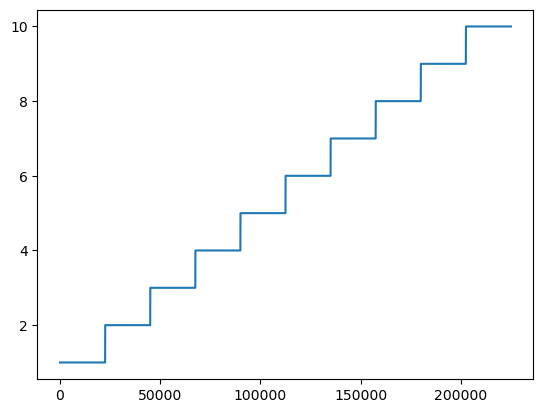

In [22]:
plt.plot(T)

In [24]:
class_names = np.array(['1-Rest', '2-Coloring', '3-Legos', '4-Wii Tennis', '5-Wii Boxing', '6-0.75m/s',
               '7-1.25m/s', '8-1.75m/s', '9-2.25m/s', '10-Stairs'])
class_names

array(['1-Rest', '2-Coloring', '3-Legos', '4-Wii Tennis', '5-Wii Boxing',
       '6-0.75m/s', '7-1.25m/s', '8-1.75m/s', '9-2.25m/s', '10-Stairs'],
      dtype='<U12')

In [23]:
T[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [25]:
class_names[[0, 1, 1, 2, 6]]

array(['1-Rest', '2-Coloring', '2-Coloring', '3-Legos', '7-1.25m/s'],
      dtype='<U12')

In [26]:
class_names[T]

IndexError: arrays used as indices must be of integer (or boolean) type

In [27]:
Tnamed = class_names[T.astype(int) - 1]
Tnamed

array([['1-Rest'],
       ['1-Rest'],
       ['1-Rest'],
       ...,
       ['10-Stairs'],
       ['10-Stairs'],
       ['10-Stairs']], dtype='<U12')

In [28]:
def generate_k_fold_cross_validation_sets(X, T, n_folds, shuffle=True):

    if shuffle:
        # Randomly order X and T
        randorder = np.arange(X.shape[0])
        np.random.shuffle(randorder)
        X = X[randorder, :]
        T = T[randorder, :]

    # Partition X and T into folds
    n_samples = X.shape[0]
    n_per_fold = round(n_samples / n_folds)
    n_last_fold = n_samples - n_per_fold * (n_folds - 1)

    folds = []
    start = 0
    for foldi in range(n_folds-1):
        folds.append( (X[start:start + n_per_fold, :], T[start:start + n_per_fold, :]) )
        start += n_per_fold
    folds.append( (X[start:, :], T[start:, :]) )

    # Yield k(k-1) assignments of Xtrain, Train, Xvalidate, Tvalidate, Xtest, Ttest

    for validation_i in range(n_folds):
        for test_i in range(n_folds):
            if test_i == validation_i:
                continue

            train_i = np.setdiff1d(range(n_folds), [validation_i, test_i])

            Xvalidate, Tvalidate = folds[validation_i]
            Xtest, Ttest = folds[test_i]
            if len(train_i) > 1:
                Xtrain = np.vstack([folds[i][0] for i in train_i])
                Ttrain = np.vstack([folds[i][1] for i in train_i])
            else:
                Xtrain, Ttrain = folds[train_i[0]]

            yield Xtrain, Ttrain, Xvalidate, Tvalidate, Xtest, Ttest

In [29]:
X.shape

(225006, 3)

In [ ]:
def times2():
    for i in range(10):
        yield i * 2

In [ ]:
list(times2())

In [ ]:
z = times2()
z

In [ ]:
next(z)

In [ ]:
next(z)

In [31]:
Xtrain,  Ttrain,  Xval, Tval, Xtest,  Ttest = next(generate_k_fold_cross_validation_sets(X,  Tnamed,  n_folds=3))

In [32]:
Xtrain.shape, Ttrain.shape, Xval.shape, Tval.shape, Xtest.shape, Ttest.shape

((75002, 3), (75002, 1), (75002, 3), (75002, 1), (75002, 3), (75002, 1))

In [33]:
np.unique(Ttrain,  return_counts=True)

(array(['1-Rest', '10-Stairs', '2-Coloring', '3-Legos', '4-Wii Tennis',
        '5-Wii Boxing', '6-0.75m/s', '7-1.25m/s', '8-1.75m/s', '9-2.25m/s'],
       dtype='<U12'),
 array([7485, 7521, 7490, 7425, 7328, 7585, 7536, 7562, 7561, 7509]))

In [34]:
%precision 5
values, counts = np.unique(Ttrain,  return_counts=True)
counts / Ttrain.shape[0]

array([0.0998 , 0.10028, 0.09986, 0.099  , 0.0977 , 0.10113, 0.10048,
       0.10082, 0.10081, 0.10012])

In [35]:
values, counts = np.unique(Tval,  return_counts=True)
counts / Tval.shape[0]

array([0.10048, 0.10001, 0.09888, 0.10054, 0.10026, 0.09929, 0.09984,
       0.10046, 0.10109, 0.09914])

In [36]:
values, counts = np.unique(Ttest,  return_counts=True)
counts / Ttest.shape[0]

array([0.09974, 0.0997 , 0.10125, 0.10045, 0.10202, 0.09957, 0.0997 ,
       0.0987 , 0.09809, 0.10076])

In [37]:
n_classes = len(np.unique(Tnamed))
nnet = nn.NeuralNetworkClassifier(X.shape[1], [10],  n_classes) 
nnet.train(Xtrain, Ttrain, Xval, Tval, n_epochs=200, method='scg')

SCG: Epoch 20 Likelihood= Train 0.86186 Validate 0.86168
SCG: Epoch 40 Likelihood= Train 0.86967 Validate 0.86916
SCG: Epoch 60 Likelihood= Train 0.87170 Validate 0.87120
SCG: Epoch 80 Likelihood= Train 0.87321 Validate 0.87272
SCG: Epoch 100 Likelihood= Train 0.87403 Validate 0.87351
SCG: Epoch 120 Likelihood= Train 0.87448 Validate 0.87400
SCG: Epoch 140 Likelihood= Train 0.87528 Validate 0.87476
SCG: Epoch 160 Likelihood= Train 0.87549 Validate 0.87498
SCG: Epoch 180 Likelihood= Train 0.87570 Validate 0.87520
SCG: Epoch 200 Likelihood= Train 0.87589 Validate 0.87541


NeuralNetworkClassifier(3, [10], 10)

In [50]:
np.unique(Tnamed)

array(['1-Rest', '10-Stairs', '2-Coloring', '3-Legos', '4-Wii Tennis',
       '5-Wii Boxing', '6-0.75m/s', '7-1.25m/s', '8-1.75m/s', '9-2.25m/s'],
      dtype='<U12')

In [49]:
np.argmax(nnet.use(Xtrain)[1][:5], axis=1)


array([8, 5, 5, 0, 8])

In [51]:
percent_correct(nnet.use(Xtrain)[0], Ttrain)

50.64265

In [52]:
percent_correct(nnet.use(Xval)[0], Tval)

50.37732

In [53]:
percent_correct(nnet.use(Xtest)[0], Ttest)

50.30799

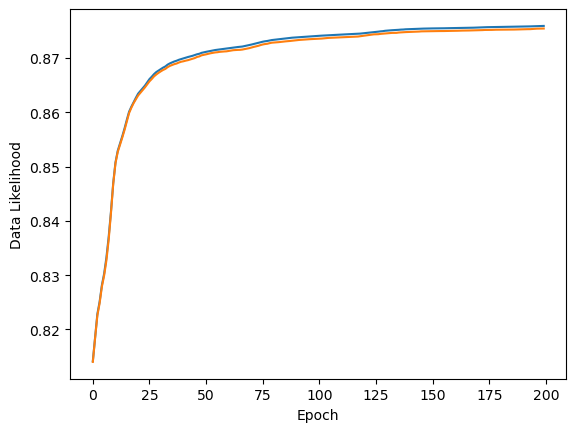

In [54]:
plt.figure()
plt.plot(nnet.get_performance_trace())
plt.xlabel('Epoch')
plt.ylabel('Data Likelihood');

Make a confusion matrix.

In [57]:
class_names

array(['1-Rest', '2-Coloring', '3-Legos', '4-Wii Tennis', '5-Wii Boxing',
       '6-0.75m/s', '7-1.25m/s', '8-1.75m/s', '9-2.25m/s', '10-Stairs'],
      dtype='<U12')

In [55]:
Classes, Probs = nnet.use(Xtrain)
table = []
for true_class in class_names:
    row = []
    for predicted_class in class_names:
        row.append(100 * np.mean(Classes[Ttrain == true_class] == predicted_class))
    table.append(row)
table

[[96.21910,
  0.93520,
  0.44088,
  0.00000,
  2.13761,
  0.00000,
  0.00000,
  0.20040,
  0.06680,
  0.00000],
 [10.20027,
  71.24166,
  10.05340,
  0.33378,
  4.59279,
  0.04005,
  0.02670,
  2.18959,
  0.94793,
  0.37383],
 [1.46801,
  10.12795,
  67.73064,
  1.17172,
  7.16498,
  1.99327,
  3.27273,
  1.95286,
  0.33670,
  4.78114],
 [1.40557,
  7.94214,
  29.20306,
  6.00437,
  17.50819,
  9.30677,
  8.59716,
  5.04913,
  5.40393,
  9.57969],
 [1.66117,
  7.94990,
  15.82070,
  2.84773,
  41.81938,
  0.98879,
  2.57086,
  9.12327,
  14.60778,
  2.61042],
 [0.03981,
  0.38482,
  0.39809,
  0.14597,
  0.14597,
  64.37102,
  30.54671,
  0.37155,
  0.38482,
  3.21125],
 [0.02645,
  0.83311,
  0.72732,
  0.15869,
  0.06612,
  30.52103,
  60.32796,
  1.15049,
  0.39672,
  5.79212],
 [0.14548,
  1.70612,
  11.33448,
  1.23000,
  9.45642,
  1.74580,
  3.58418,
  23.68734,
  42.37535,
  4.73482],
 [0.03995,
  1.47823,
  7.47103,
  0.86563,
  9.56186,
  1.45159,
  2.57025,
  18.63098,
  55.

In [56]:
import pandas
conf = pandas.DataFrame(table, index=class_names, columns=class_names)
conf

,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.219105,0.935204,0.440882,0.000000,2.137609,0.000000,0.000000,0.200401,0.066800,0.000000
2-Coloring,10.200267,71.241656,10.053405,0.333778,4.592790,0.040053,0.026702,2.189586,0.947931,0.373832
3-Legos,1.468013,10.127946,67.730640,1.171717,7.164983,1.993266,3.272727,1.952862,0.336700,4.781145
4-Wii Tennis,1.405568,7.942140,29.203057,6.004367,17.508188,9.306769,8.597162,5.049127,5.403930,9.579694
5-Wii Boxing,1.661173,7.949901,15.820699,2.847726,41.819380,0.988794,2.570864,9.123270,14.607779,2.610415
6-0.75m/s,0.039809,0.384820,0.398089,0.145966,0.145966,64.371019,30.546709,0.371550,0.384820,3.211253
7-1.25m/s,0.026448,0.833113,0.727321,0.158688,0.066120,30.521026,60.327956,1.150489,0.396720,5.792118
8-1.75m/s,0.145483,1.706124,11.334480,1.229996,9.456421,1.745801,3.584182,23.687343,42.375347,4.734823
9-2.25m/s,0.039952,1.478226,7.471035,0.865628,9.561859,1.451591,2.570249,18.630976,55.280330,2.650153
10-Stairs,0.026592,8.270177,15.091078,5.052520,3.523468,13.442361,25.408855,5.424811,4.494083,19.266055


See [this site](https://coderzcolumn.com/tutorials/python/simple-guide-to-style-display-of-pandas-dataframes) for all of the fun ways we can format a pandas DataFrame.

In [60]:
conf.style.background_gradient(cmap='Blues', axis=None).format('{:.1f}')

,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.2,0.9,0.4,0.0,2.1,0.0,0.0,0.2,0.1,0.0
2-Coloring,10.2,71.2,10.1,0.3,4.6,0.0,0.0,2.2,0.9,0.4
3-Legos,1.5,10.1,67.7,1.2,7.2,2.0,3.3,2.0,0.3,4.8
4-Wii Tennis,1.4,7.9,29.2,6.0,17.5,9.3,8.6,5.0,5.4,9.6
5-Wii Boxing,1.7,7.9,15.8,2.8,41.8,1.0,2.6,9.1,14.6,2.6
6-0.75m/s,0.0,0.4,0.4,0.1,0.1,64.4,30.5,0.4,0.4,3.2
7-1.25m/s,0.0,0.8,0.7,0.2,0.1,30.5,60.3,1.2,0.4,5.8
8-1.75m/s,0.1,1.7,11.3,1.2,9.5,1.7,3.6,23.7,42.4,4.7
9-2.25m/s,0.0,1.5,7.5,0.9,9.6,1.5,2.6,18.6,55.3,2.7
10-Stairs,0.0,8.3,15.1,5.1,3.5,13.4,25.4,5.4,4.5,19.3


In [61]:
def confusion_matrix(Y_classes, T, class_names, background_cmap=None):
    table = []
    for true_class in class_names:
        row = []
        for Y_class in class_names:
            row.append(100 * np.mean(Y_classes[T == true_class] == Y_class))
        table.append(row)
    conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
    print('Percent Correct (Actual class in rows, Predicted class in columns')
    if background_cmap:
        return conf_matrix.style.background_gradient(cmap=background_cmap, axis=None).format('{:.1f}')
    else:
        return conf_matrix

In [62]:
confusion_matrix(nnet.use(Xtrain)[0], Ttrain, class_names)

Percent Correct (Actual class in rows, Predicted class in columns


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.219105,0.935204,0.440882,0.000000,2.137609,0.000000,0.000000,0.200401,0.066800,0.000000
2-Coloring,10.200267,71.241656,10.053405,0.333778,4.592790,0.040053,0.026702,2.189586,0.947931,0.373832
3-Legos,1.468013,10.127946,67.730640,1.171717,7.164983,1.993266,3.272727,1.952862,0.336700,4.781145
4-Wii Tennis,1.405568,7.942140,29.203057,6.004367,17.508188,9.306769,8.597162,5.049127,5.403930,9.579694
5-Wii Boxing,1.661173,7.949901,15.820699,2.847726,41.819380,0.988794,2.570864,9.123270,14.607779,2.610415
6-0.75m/s,0.039809,0.384820,0.398089,0.145966,0.145966,64.371019,30.546709,0.371550,0.384820,3.211253
7-1.25m/s,0.026448,0.833113,0.727321,0.158688,0.066120,30.521026,60.327956,1.150489,0.396720,5.792118
8-1.75m/s,0.145483,1.706124,11.334480,1.229996,9.456421,1.745801,3.584182,23.687343,42.375347,4.734823
9-2.25m/s,0.039952,1.478226,7.471035,0.865628,9.561859,1.451591,2.570249,18.630976,55.280330,2.650153
10-Stairs,0.026592,8.270177,15.091078,5.052520,3.523468,13.442361,25.408855,5.424811,4.494083,19.266055


In [63]:
confusion_matrix(nnet.use(Xtrain)[0], Ttrain, class_names, 'Blues')

Percent Correct (Actual class in rows, Predicted class in columns


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.2,0.9,0.4,0.0,2.1,0.0,0.0,0.2,0.1,0.0
2-Coloring,10.2,71.2,10.1,0.3,4.6,0.0,0.0,2.2,0.9,0.4
3-Legos,1.5,10.1,67.7,1.2,7.2,2.0,3.3,2.0,0.3,4.8
4-Wii Tennis,1.4,7.9,29.2,6.0,17.5,9.3,8.6,5.0,5.4,9.6
5-Wii Boxing,1.7,7.9,15.8,2.8,41.8,1.0,2.6,9.1,14.6,2.6
6-0.75m/s,0.0,0.4,0.4,0.1,0.1,64.4,30.5,0.4,0.4,3.2
7-1.25m/s,0.0,0.8,0.7,0.2,0.1,30.5,60.3,1.2,0.4,5.8
8-1.75m/s,0.1,1.7,11.3,1.2,9.5,1.7,3.6,23.7,42.4,4.7
9-2.25m/s,0.0,1.5,7.5,0.9,9.6,1.5,2.6,18.6,55.3,2.7
10-Stairs,0.0,8.3,15.1,5.1,3.5,13.4,25.4,5.4,4.5,19.3


SCG: Epoch 10 Likelihood= Train 0.83812 Validate 0.83785
SCG: Epoch 20 Likelihood= Train 0.86256 Validate 0.86210
SCG: Epoch 30 Likelihood= Train 0.87206 Validate 0.87153
SCG: Epoch 40 Likelihood= Train 0.87659 Validate 0.87600
SCG: Epoch 50 Likelihood= Train 0.87980 Validate 0.87935
SCG: Epoch 60 Likelihood= Train 0.88234 Validate 0.88213
SCG: Epoch 70 Likelihood= Train 0.88441 Validate 0.88424
SCG: Epoch 80 Likelihood= Train 0.88596 Validate 0.88572
SCG: Epoch 90 Likelihood= Train 0.88725 Validate 0.88705
SCG: Epoch 100 Likelihood= Train 0.88826 Validate 0.88796


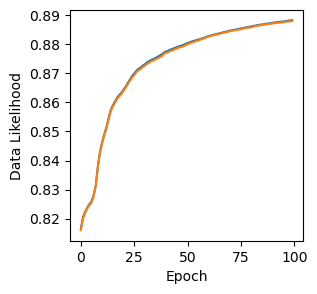

In [64]:
nnet = nn.NeuralNetworkClassifier(X.shape[1], [100, 50],  n_classes) 
nnet.train(Xtrain, Ttrain, Xval, Tval, n_epochs=100, method='scg')

plt.figure(figsize=(3, 3))
plt.plot(nnet.get_performance_trace())
plt.xlabel('Epoch')
plt.ylabel('Data Likelihood');

In [66]:
print('Training Data')
confusion_matrix(nnet.use(Xtrain)[0], Ttrain, class_names, 'Blues')

Training Data
Percent Correct (Actual class in rows, Predicted class in columns


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,95.9,0.6,1.3,0.2,1.6,0.0,0.0,0.2,0.1,0.0
2-Coloring,6.7,76.5,8.7,1.7,2.6,0.0,0.0,2.6,0.3,0.7
3-Legos,1.3,4.3,71.1,3.2,5.5,2.1,2.1,2.4,0.4,7.6
4-Wii Tennis,1.1,5.6,24.8,14.0,12.4,9.8,5.6,7.2,4.2,15.4
5-Wii Boxing,1.1,5.9,11.4,3.5,52.2,0.6,1.5,9.2,10.0,4.6
6-0.75m/s,0.0,0.2,0.4,0.1,0.2,71.1,22.2,0.4,0.3,5.0
7-1.25m/s,0.0,0.3,0.3,0.3,0.2,28.3,60.1,1.2,0.5,8.7
8-1.75m/s,0.1,1.4,6.4,2.4,9.9,1.4,3.5,36.9,31.6,6.3
9-2.25m/s,0.0,1.2,4.9,2.0,10.6,1.2,1.9,24.6,49.5,4.0
10-Stairs,0.0,4.8,12.1,5.9,3.9,13.4,18.5,6.7,3.7,31.0


In [67]:
print('Validation Data')
confusion_matrix(nnet.use(Xval)[0], Tval, class_names, 'Blues')

Validation Data
Percent Correct (Actual class in rows, Predicted class in columns


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.0,0.5,1.3,0.3,1.6,0.0,0.0,0.2,0.1,0.0
2-Coloring,6.3,76.6,8.8,1.8,2.9,0.0,0.1,2.5,0.2,0.7
3-Legos,1.2,4.7,71.1,3.1,5.4,2.1,2.1,2.3,0.5,7.4
4-Wii Tennis,1.3,6.0,24.9,13.7,12.9,9.7,5.2,7.6,4.2,14.6
5-Wii Boxing,1.3,6.0,11.0,3.6,52.1,0.7,1.4,9.1,10.3,4.7
6-0.75m/s,0.0,0.1,0.3,0.1,0.2,70.5,23.3,0.5,0.4,4.6
7-1.25m/s,0.0,0.3,0.3,0.2,0.3,28.6,60.5,1.2,0.5,8.1
8-1.75m/s,0.2,1.6,6.0,2.7,10.4,1.4,3.3,36.5,31.4,6.5
9-2.25m/s,0.2,1.1,4.4,2.1,10.4,1.5,2.0,25.1,49.0,4.2
10-Stairs,0.0,5.1,11.7,5.8,4.0,13.4,18.5,6.6,4.0,30.9


In [68]:
print('Test Data')
confusion_matrix(nnet.use(Xtest)[0], Ttest, class_names, 'Blues')

Test Data
Percent Correct (Actual class in rows, Predicted class in columns


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.0,0.5,1.4,0.3,1.6,0.0,0.0,0.1,0.1,0.0
2-Coloring,6.1,77.1,8.7,1.8,2.8,0.0,0.1,2.6,0.2,0.6
3-Legos,1.3,4.5,70.9,3.5,5.6,2.2,2.0,2.3,0.5,7.2
4-Wii Tennis,1.1,5.5,24.9,13.8,12.7,10.4,5.6,6.8,4.3,14.9
5-Wii Boxing,1.2,5.9,10.8,3.6,52.2,0.7,1.3,9.1,10.3,4.8
6-0.75m/s,0.0,0.3,0.3,0.1,0.3,70.2,23.2,0.4,0.4,4.8
7-1.25m/s,0.0,0.3,0.4,0.4,0.1,28.6,59.1,1.2,0.6,9.3
8-1.75m/s,0.1,1.2,6.0,2.3,10.5,1.6,3.4,37.4,30.9,6.5
9-2.25m/s,0.1,1.3,4.9,2.5,10.1,1.5,2.2,24.7,48.3,4.3
10-Stairs,0.0,4.6,12.5,6.2,3.9,13.7,18.5,6.5,4.0,30.1


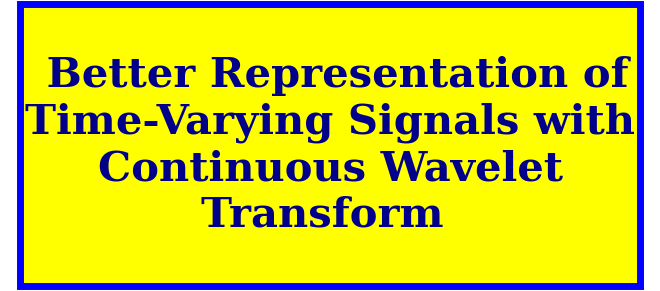

In [16]:
banner.next_topic()

## Better Representation of Time-Varying Signals with Continuous Wavelet Transform

In [69]:
import scipy.signal as sig

def cwt(eeg, Fs, freqs, width, channelNames=None, graphics=False):
    if freqs.min() == 0:
        print('cwt: Frequencies must be greater than 0.')
        return None, None
    nChannels, nSamples = eeg.shape
    if not channelNames and graphics:
        channelNames = ['Channel {:2d}'.format(i) for i in range(nChannels)]

    nFreqs = len(freqs)
    tfrep = np.zeros((nChannels,  nFreqs, nSamples))
    tfrepPhase = np.zeros((nChannels, nFreqs, nSamples))

    for ch in range(nChannels):
        print('channel', ch, ' freq ', end='')
        for freqi in range(nFreqs):
            print(freqs[freqi], ' ', end='')
            mag, phase = energyvec(freqs[freqi], eeg[ch, :], Fs, width)
            tfrepPhase[ch, freqi, :] = phase
            tfrep[ch, freqi, :] = mag
        print()

    return tfrep, tfrepPhase

def morletLength(Fs, f, width):
    """ len = morletLength(Fs, f, width) """
    dt = 1.0/Fs
    sf = f/width
    st = 1.0/(2*np.pi*sf)
    return int((3.5*st - -3.5*st)/dt)

def energyvec(f, s, Fs, width):
    """
    function [y, phase] <- energyvec(f, s, Fs, width)
    function y <- energyvec(f, s, Fs, width)

    Return a vector containing the energy as a
    function of time for frequency f. The energy
    is calculated using Morlet''s wavelets.
    s : signal
    Fs: sampling frequency
    width : width of Morlet wavelet (><- 5 suggested).
    """

    dt = 1.0/Fs
    sf = f/float(width)
    st = 1.0/(2*np.pi*sf)

    t = np.arange(-3.5*st, 3.5*st, step=dt)
    m = morlet(f, t, width)
    # yconv = np.convolve(s, m, mode="same")
    yconv = sig.fftconvolve(s, m, mode='same')

    lengthMorlet = len(m)
    firsthalf = int(lengthMorlet/2.0 + 0.5)
    secondhalf = lengthMorlet - firsthalf

    padtotal = len(s) - len(yconv)
    padfront = int(padtotal/2.0 + 0.5)
    padback = padtotal - padfront
    yconvNoBoundary = yconv
    y = np.abs(yconvNoBoundary)**2
    phase = np.angle(yconvNoBoundary, deg=True)
    return y, phase

######################################################################
      
def morlet(f, t, width):
    """
    function y <- morlet(f, t, width)
    Morlet''s wavelet for frequency f and time t.
    The wavelet will be normalized so the total energy is 1.
    width defines the width of the wavelet.
    A value ><- 5 is suggested.

    Ref: Tallon-Baudry et al., J. Neurosci. 15, 722-734 (1997), page 724

    Ole Jensen, August 1998
    """
    sf = f/float(width)
    st = 1.0/(2*np.pi*sf)
    A = 1.0/np.sqrt(st*np.sqrt(2*np.pi))
    y = A*np.exp(-t**2/(2*st**2)) * np.exp(1j*2*np.pi*f*t)
    return y

In [70]:
import time
width = 75 
maxFreq = 20
freqs = np.arange(0.5, maxFreq, 0.5) # makes same freqs used in stft above
start = time.time()
tfrep, tfrepPhase = cwt(data[:, 1:].T,  75,  freqs,  width)
elapsed_time = time.time() - start
print(f'CWT time: {elapsed_time} seconds')

channel 0  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
channel 1  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
channel 2  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
CWT time: 6.0267767906188965 seconds


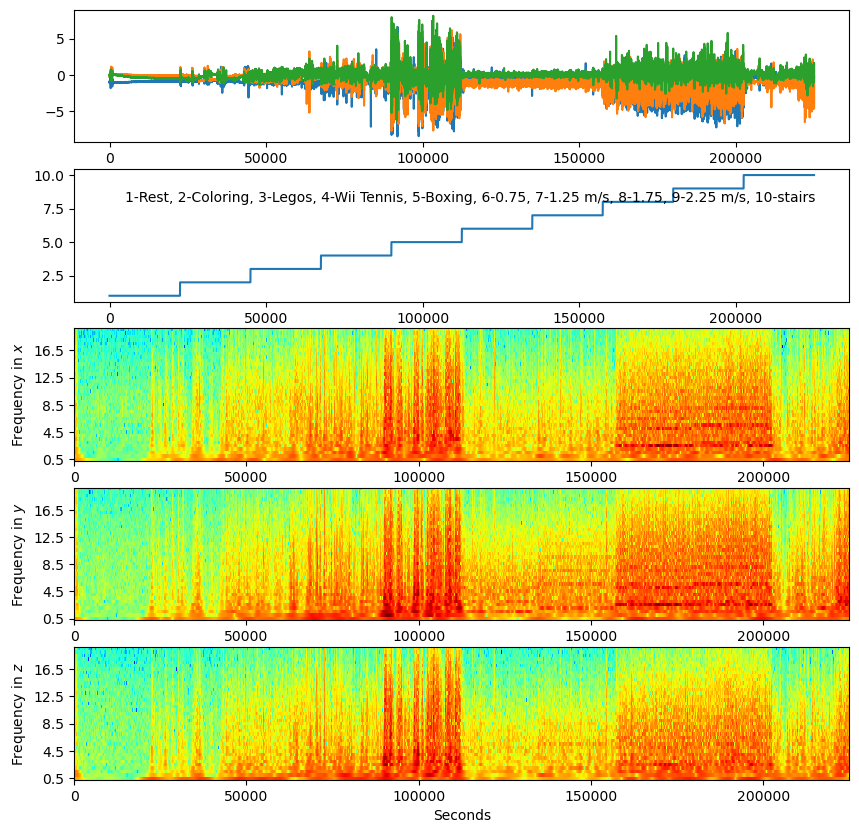

In [71]:
plt.figure(figsize=(10, 10))
plt.subplot(5, 1, 1)
plt.plot(data[:, 1:])
plt.axis('tight')

plt.subplot(5, 1, 2)
plt.plot(data[:, 0])
plt.text(5000, 8, '1-Rest, 2-Coloring, 3-Legos, 4-Wii Tennis, 5-Boxing, 6-0.75, 7-1.25 m/s, 8-1.75, 9-2.25 m/s, 10-stairs')
plt.axis('tight')

nSensors = data.shape[1] - 1
for i in range(nSensors):
    plt.subplot(5, 1, i+3)
    plt.imshow(np.log(tfrep[i, :, :]), 
               interpolation='nearest', origin='lower',
               cmap=plt.cm.jet) #plt.cm.Reds)
    plt.xlabel('Seconds')
    plt.ylabel('Frequency in ' + ('$x$', '$y$', '$z$')[i])
    tickstep = round(len(freqs) / 5)
    plt.yticks(np.arange(len(freqs))[::tickstep],
                   [str(i) for i in freqs[::tickstep]])
    plt.axis('auto')
    plt.axis('tight')

In [72]:
tfrep.shape

(3, 39, 225006)

In [73]:
X = tfrep.reshape((3*39, -1)).T
X.shape, T.shape, len(np.unique(T))

((225006, 117), (225006, 1), 10)

In [74]:
Xtrain, Ttrain, Xval, Tval, Xtest, Ttest = next(generate_k_fold_cross_validation_sets(X, Tnamed, 3))

In [76]:
print(Xtrain.shape)
nnet = nn.NeuralNetworkClassifier(X.shape[1], [10], 10)  #10 classes 
nnet.train(Xtrain, Ttrain, Xval, Tval, n_epochs = 100, learning_rate=0.1, method='adam')

(75002, 117)
Adam: Epoch 10 Likelihood= Train 0.85639 Validate 0.85653
Adam: Epoch 20 Likelihood= Train 0.89332 Validate 0.89361
Adam: Epoch 30 Likelihood= Train 0.91787 Validate 0.91809
Adam: Epoch 40 Likelihood= Train 0.92877 Validate 0.92884
Adam: Epoch 50 Likelihood= Train 0.94121 Validate 0.94119
Adam: Epoch 60 Likelihood= Train 0.94671 Validate 0.94677
Adam: Epoch 70 Likelihood= Train 0.95359 Validate 0.95346
Adam: Epoch 80 Likelihood= Train 0.95712 Validate 0.95698
Adam: Epoch 90 Likelihood= Train 0.95158 Validate 0.95116
Adam: Epoch 100 Likelihood= Train 0.96039 Validate 0.96023


NeuralNetworkClassifier(117, [10], 10)

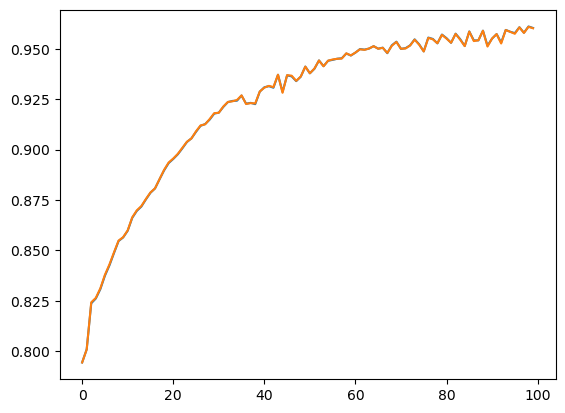

In [77]:
plt.plot(nnet.get_performance_trace())

In [78]:
percent_correct(nnet.use(Xtrain)[0], Ttrain)

85.43772

In [79]:
print('Test Data')
confusion_matrix(nnet.use(Xtest)[0], Ttest, class_names, 'Blues')

Test Data
Percent Correct (Actual class in rows, Predicted class in columns


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,89.1,5.2,0.9,0.0,0.0,4.7,0.0,0.0,0.0,0.0
2-Coloring,33.8,32.3,14.6,0.0,0.0,16.9,0.0,0.0,0.0,2.5
3-Legos,0.0,2.3,87.7,0.6,0.2,0.0,0.0,0.0,0.0,9.3
4-Wii Tennis,0.0,0.0,0.7,97.8,1.0,0.0,0.0,0.1,0.3,0.0
5-Wii Boxing,0.0,0.0,0.0,1.4,98.0,0.0,0.0,0.0,0.6,0.0
6-0.75m/s,3.5,0.9,0.0,0.0,0.0,67.9,21.4,0.0,0.0,6.3
7-1.25m/s,1.3,0.0,0.0,0.0,0.0,3.4,93.8,0.0,0.0,1.5
8-1.75m/s,0.0,0.0,0.0,0.0,0.0,0.0,0.1,99.7,0.2,0.0
9-2.25m/s,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.2,99.2,0.0
10-Stairs,0.0,3.4,4.7,0.0,0.0,3.5,0.0,0.0,0.0,88.4
